<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Transformada%20de%20Laplace/funci%C3%B3n_de_transferencia_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

In [14]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
A = 5 #Amplitud de la corriente
Wo = 10 #frecuencia
#Entrada de interés en Laplace
X = A/(s +sym.I*Wo) # Fuente de corriente en AC, función seno
H=control.TransferFunction(s,R*C*s**2 + s + R/L,s)
#Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

            5⋅s            
───────────────────────────
           ⎛     2       R⎞
(s + 10⋅ⅈ)⋅⎜C⋅R⋅s  + s + ─⎟
           ⎝             L⎠

In [15]:
#función de salida en Laplace factorizada
Yf = Y.apart(s)
Yf

              5⋅ⅈ⋅L⋅R⋅(10⋅C⋅L⋅s - ⅈ)                             50⋅ⅈ⋅L       
- ───────────────────────────────────────────── + ────────────────────────────
                           ⎛       2          ⎞   (s + 10⋅ⅈ)⋅(100⋅C⋅L⋅R + 10⋅ⅈ
  (100⋅C⋅L⋅R + 10⋅ⅈ⋅L - R)⋅⎝C⋅L⋅R⋅s  + L⋅s + R⎠                               

       
───────
⋅L - R)
       

In [16]:
for j in range(len(Yf.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Yf.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Yf.args[j], s, t)
yt

          ⎛                            -t      ⎛     ____________⎞            
          ⎜                           ─────    ⎜    ╱      2     ⎟        -t  
          ⎜         ⎛   5       ⅈ  ⎞  2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟       ─────
          ⎜2⋅C⋅√L⋅R⋅⎜- ──── - ─────⎟⋅ℯ     ⋅sin⎜─────────────────⎟       2⋅C⋅R
          ⎜         ⎜     2   C⋅L⋅R⎟           ⎝     2⋅C⋅√L⋅R    ⎠   10⋅ℯ     
          ⎜         ⎝  C⋅R         ⎠                                          
  5⋅ⅈ⋅L⋅R⋅⎜─────────────────────────────────────────────────────── + ─────────
          ⎜                       ____________                                
          ⎜                      ╱      2                                     
          ⎝                    ╲╱  4⋅C⋅R  - L                                 
- ────────────────────────────────────────────────────────────────────────────
                                         100⋅C⋅L⋅R + 10⋅ⅈ⋅L - R               

                       ⎞                         
 

In [17]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yf.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                 ⎛                     -5⋅t                                   
                 ⎜                     ─────                                  
                 ⎜                       4      ⎛√55⋅t⎞       -5⋅t            
                 ⎜4⋅√55⋅(-25/2 - 5⋅ⅈ)⋅ℯ     ⋅sin⎜─────⎟       ─────           
                 ⎜                              ⎝  4  ⎠         4      ⎛√55⋅t⎞
  5⋅ⅈ⋅(19 - 5⋅ⅈ)⋅⎜───────────────────────────────────── + 10⋅ℯ     ⋅cos⎜─────⎟
                 ⎝                  55                                 ⎝  4  ⎠
- ────────────────────────────────────────────────────────────────────────────
                                       772                                    

⎞                           
⎟                           
⎟                           
⎟                           
⎟                           
⎟                    -10⋅ⅈ⋅t
⎠   25⋅ⅈ⋅(19 - 5⋅ⅈ)⋅ℯ       
─ + ────────────────────────
              386           

In [18]:
#Función de salida Y(s) -- Laplace
Yf

              5⋅ⅈ⋅L⋅R⋅(10⋅C⋅L⋅s - ⅈ)                             50⋅ⅈ⋅L       
- ───────────────────────────────────────────── + ────────────────────────────
                           ⎛       2          ⎞   (s + 10⋅ⅈ)⋅(100⋅C⋅L⋅R + 10⋅ⅈ
  (100⋅C⋅L⋅R + 10⋅ⅈ⋅L - R)⋅⎝C⋅L⋅R⋅s  + L⋅s + R⎠                               

       
───────
⋅L - R)
       

In [19]:
#Función de salida y(t) -- en tiempo
yt

                 ⎛                     -5⋅t                                   
                 ⎜                     ─────                                  
                 ⎜                       4      ⎛√55⋅t⎞       -5⋅t            
                 ⎜4⋅√55⋅(-25/2 - 5⋅ⅈ)⋅ℯ     ⋅sin⎜─────⎟       ─────           
                 ⎜                              ⎝  4  ⎠         4      ⎛√55⋅t⎞
  5⋅ⅈ⋅(19 - 5⋅ⅈ)⋅⎜───────────────────────────────────── + 10⋅ℯ     ⋅cos⎜─────⎟
                 ⎝                  55                                 ⎝  4  ⎠
- ────────────────────────────────────────────────────────────────────────────
                                       772                                    

⎞                           
⎟                           
⎟                           
⎟                           
⎟                           
⎟                    -10⋅ⅈ⋅t
⎠   25⋅ⅈ⋅(19 - 5⋅ⅈ)⋅ℯ       
─ + ────────────────────────
              386           

Diagrama de Polos y Ceros

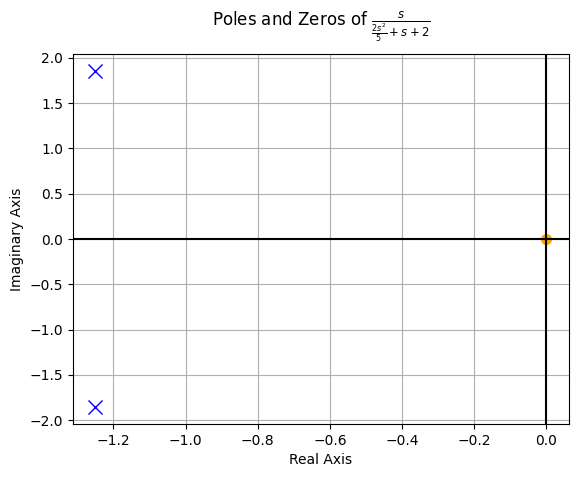

In [20]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

Diagrama de Bode

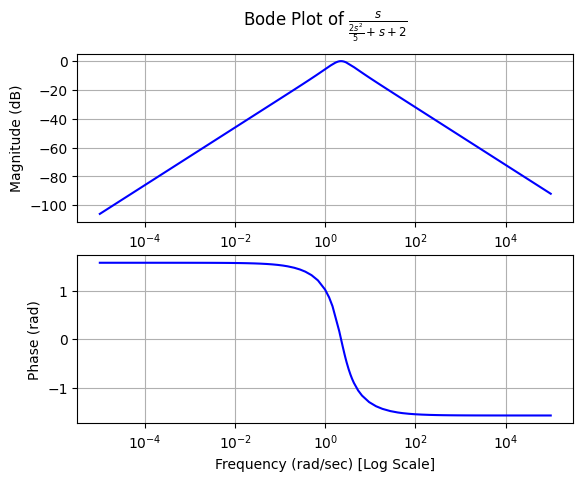

In [21]:
control.bode_plot(HRLC)

Respuesta Impulso

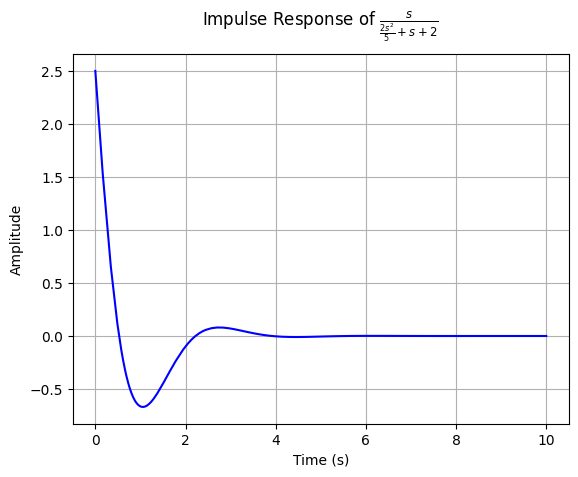

In [22]:
control.impulse_response_plot(HRLC)

Respuesta escalón

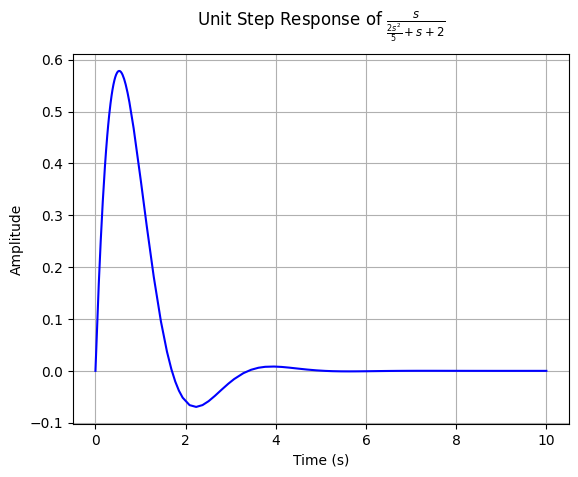

In [23]:
control.step_response_plot(HRLC)

Respuesta a la rampa

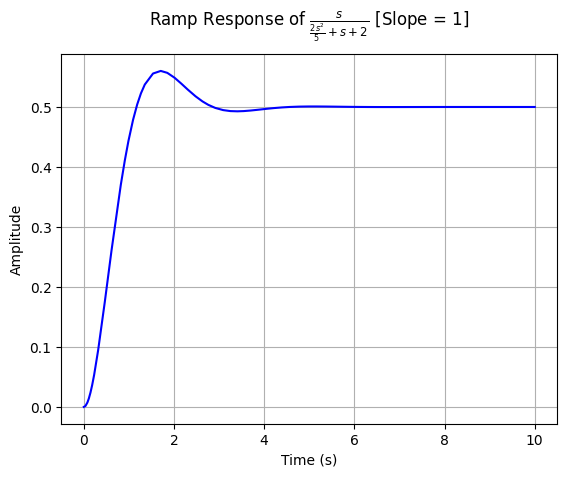

In [24]:
control.ramp_response_plot(HRLC)